This is the first course in the pytorch learning footprints series. It will last for 4 weeks and will cover the core concepts of pytorch.

In [2]:
# 验证Metal支持
import torch
print(torch.backends.mps.is_available())  # 应返回True
print(torch.device('mps'))  # 设备类型显示应为mps
# MPS加速支持
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# 数据迁移到MPS设备
tensor_mps = torch.randn(3,3).to(device)  
# model = MyModel().to(device)

ImportError: dlopen(/Users/zyf/miniforge3/envs/torch-mps/lib/python3.9/site-packages/torch/_C.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/libtorch_cpu.dylib
  Referenced from: <CEA0A8C8-A153-3FB9-831F-65F5E97493EE> /Users/zyf/miniforge3/envs/torch-mps/lib/python3.9/site-packages/torch/lib/libtorch_python.dylib
  Reason: tried: '/Users/zyf/miniforge3/envs/torch-mps/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib' (no such file), '/Users/zyf/miniforge3/envs/torch-mps/lib/python3.9/site-packages/torch/lib/../../../../libtorch_cpu.dylib' (no such file), '/Users/zyf/miniforge3/envs/torch-mps/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib' (no such file), '/Users/zyf/miniforge3/envs/torch-mps/lib/python3.9/site-packages/torch/../../../libtorch_cpu.dylib' (no such file), '/Users/zyf/miniforge3/envs/torch-mps/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib' (no such file), '/Users/zyf/miniforge3/envs/torch-mps/lib/python3.9/site-packages/torch/../../../libtorch_cpu.dylib' (no such file), '/Users/zyf/miniforge3/envs/torch-mps/bin/../lib/libtorch_cpu.dylib' (no such file), '/Users/zyf/miniforge3/envs/torch-mps/bin/../lib/libtorch_cpu.dylib' (no such file), '/usr/local/lib/libtorch_cpu.dylib' (no such file), '/usr/lib/libtorch_cpu.dylib' (no such file, not in dyld cache)

Tensor manipulation is the core concept of PyTorch. It is used to perform mathematical operations on multi-dimensional arrays. It is a powerful tool for building neural networks and performing machine learning tasks.

In [32]:
# Create a tensor with random values and print its shape and data type.
import torch

# Create a tensor with random values
tensor = torch.rand(3, 4)

# Print the shape and data type of the tensor
print("Shape of tensor:", tensor.shape)
print("Data type of tensor:", tensor.dtype)

# Create a tensor with random values and specify the data type
tensor = torch.rand(3, 4, dtype=torch.float32)

# Print the shape and data type of the tensor
print("Shape of tensor:", tensor.shape)
print("Data type of tensor:", tensor.dtype) 

# Create a tensor with random values and specify the device (CPU or GPU)
if torch.cuda.is_available():
    tensor = torch.rand(3, 4, device='cuda')
else:
    tensor = torch.rand(3, 4, device='cpu')

# Print the shape and data type of the tensor    
print("Shape of tensor:", tensor.shape)
print("Data type of tensor:", tensor.dtype)
print("Device of tensor:", tensor.device)    

Shape of tensor: torch.Size([3, 4])
Data type of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Data type of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Data type of tensor: torch.float32
Device of tensor: cpu


In [33]:
# build a tensor using torch.tensor() function
import torch

# create a tensor with random values
x = torch.rand(3, 4)
print(x)

# create a tensor with zeros
y = torch.zeros(2, 3)
print(y)

# create a tensor with ones
z = torch.ones(2, 3)
print(z)

# create a tensor with specific values
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(a)

# create a tensor from numpy array
import numpy as np

b = torch.from_numpy(np.array([[1, 2, 3], [4, 5, 6]]))
print(b)

# create a tensor from a list
c = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(c)

tensor([[0.4431, 0.2959, 0.0485, 0.0134],
        [0.6858, 0.2255, 0.1786, 0.4610],
        [0.3335, 0.3382, 0.5161, 0.3939]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [34]:
# Basic calculations of tensors : matrix multiplication, element-wise operations, broadcasting, and slicing.

import torch

# Matrix multiplication
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
c = torch.mm(a, b)
print(c)

# Element-wise operations
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = a + b
print(c)

# Broadcasting
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([5, 6])
c = a + b
print(c)

# Slicing
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a[1:3, 1:3]
print(b)

tensor([[19, 22],
        [43, 50]])
tensor([5, 7, 9])
tensor([[ 6,  8],
        [ 8, 10]])
tensor([[5, 6],
        [8, 9]])


In [35]:
# The properties of the auto grad
import torch

# Create a tensor and set requires_grad=True to track gradients
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)

# Define a function to compute the sum of squares of the tensor
def sum_of_squares(x):
    return (x ** 2).sum()

# Compute the gradient of the sum of squares with respect to the input tensor
y = sum_of_squares(x)
y.backward()

# Print the gradient of the sum of squares with respect to the input tensor
print(x.grad)

# Print other parameters of x.grad
print(x.grad.shape)
print(x.grad.dtype)
print(x.grad.requires_grad)


tensor([2., 4., 6., 8.])
torch.Size([4])
torch.float32
False


Small task: Implement a simple linear regression model using PyTorch

Epoch [10/100], Loss: 201.0257
Epoch [20/100], Loss: 65.9608
Epoch [30/100], Loss: 31.6040
Epoch [40/100], Loss: 22.7955
Epoch [50/100], Loss: 20.4913
Epoch [60/100], Loss: 19.8582
Epoch [70/100], Loss: 19.6646
Epoch [80/100], Loss: 19.5933
Epoch [90/100], Loss: 19.5604
Epoch [100/100], Loss: 19.5421


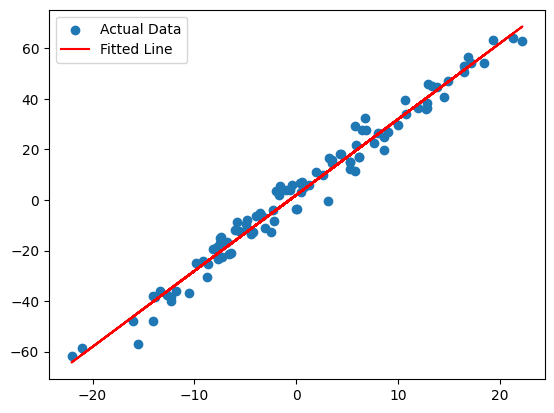

Trained Model: y = 3.00x + 2.00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# 1. 生成数据 (y = 3x + 2 + 噪声)，并将数据迁移到MPS设备
torch.manual_seed(42)
X = torch.randn(100, 1).to(device) * 10  # 100 个数据点
Y = 3 * X + 2 + torch.randn(100, 1).to(device) * 5  # 加入一些噪声

# 2. 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 定义层，相当于准备积木块
        self.linear = nn.Linear(1, 1)  # 1 个输入，1 个输出

    def forward(self, x):
        # 利用定义层前向传播，相当于用积木块搭建出结构
        return self.linear(x)

# 2.1 实例化模型并迁移到MPS设备
model = LinearRegressionModel().to(device)

# 3. 选择损失函数（MSE）和优化器（SGD）
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. 训练模型
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()  # 清空梯度
    predictions = model(X)  # 前向传播
    loss = criterion(predictions, Y)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 5. 绘制结果
with torch.no_grad():
    predicted = model(X)

    # 把数据迁移到CPU上进行绘图
    X, Y, predicted = X.cpu(), Y.cpu(), predicted.cpu()
    plt.scatter(X.numpy(), Y.numpy(), label="Actual Data")
    plt.plot(X.numpy(), predicted.numpy(), color='red', label="Fitted Line")
    plt.legend()
    plt.show()

# 6. 输出训练后的模型参数
w, b = model.linear.weight.item(), model.linear.bias.item()
print(f"Trained Model: y = {w:.2f}x + {b:.2f}")



在一个通用的深度学习框架中，有以下几个核心概念：

 - 层：包括线性层，卷积层，循环层，激活层等。层是神经网络的基本组件，是对输入数据进行操作并产生输出的函数。 
    
    - 线性层：nn.Linear()是最常用的层之一，它可以将输入数据进行线性变换，输出维度可以自定义。
    
    - 卷积层：nn.Conv2d()和nn.Conv3d()，卷积层是对输入数据进行二维或三维的卷积操作，输出维度可以自定义。

    - 循环层：nn.RNN()和nn.LSTM()，循环层是对输入数据进行循环操作，输出维度可以自定义。

    - 激活层：nn.ReLU()、nn.Sigmoid()、nn.Tanh()等，激活层是对输入数据进行非线性变换，输出维度不变。

 - 模型：模型是神经网络的主体，它由多个层组成，并通过连接层、激活层等操作进行信息的传递。

 - 损失函数：损失函数是衡量模型预测结果与真实结果之间的差距的函数。包括均方误差、交叉熵等。

 - 优化器：优化器是用于更新模型参数的算法。包括随机梯度下降、动量法、Adam等。

 - 数据集：数据集是用于训练模型的数据集合。包括训练集、验证集、测试集等。

 - DataLoader：DataLoader是用于加载数据集的工具。它可以将数据集分批次、打乱、并行化处理，以提高训练效率。